# DBSCAN
__MATH 3480__ - Dr. Michael Olson

Reading:
* Geron, Chapter 3, pp. 89-97

## Reading
* Geron, Chapter 9

### Additional Resources
* [YouTube: Channel - Title](https://www.youtube.com/watch?v=QXOkPvFM6NU)

## Theory
In the K-Means and Gaussian Mixture Models, we start with a point and then find all the points within a certain radius of that point. This works very well for circular grouping. But what if one group is actually wrapped around another dataset? Two common algorithms that help with more oddly-shaped groups are DBSCAN and Hierarchical Clustering

When we visually see datapoints, our eye naturally groups these data into groups based on how close points are to each other (visual density). DBSCAN mimicks this behavior.

## Algorithm
* Define a radius $\epsilon$
* Find how many points are within a distance $\epsilon$ of a given point
  * If one point has 4 or more points within a distance $\epsilon$, this is a core point
  * The number of nearby points is user-defined, but we'll use 4 for our algorithm today
* Choose one core point and assign it to the first cluster
* Any core points within a radius $\epsilon$ are also assigned to the cluster
  * Since it is a core point, any other core points that are within $\epsilon$ of this new point are also added
  * (Nearby core points *join* and *extend* the cluster)
* Once all core points are added, we add any non-core points that are also within a radius $\epsilon$ of any core point in the cluster
  * Since they are not core points, we don't consider any other points that may be within $\epsilon$ of these points
  * (Nearby non-core points *join* but do not extend the cluster)
* Once the first cluster is completed, we look at another unassigned core point, and follow the same process to form a second cluster
* Once all core points have been assigned to a cluster, any remaining non-core points are marked as outliers

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the Data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)

1. 

In [30]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.08, min_samples=2)
   # eps is radius of circle around each point
   # min_samples is number of points needed within the radius eps to be classified as a core point
y_predict = dbscan.fit_predict(X)

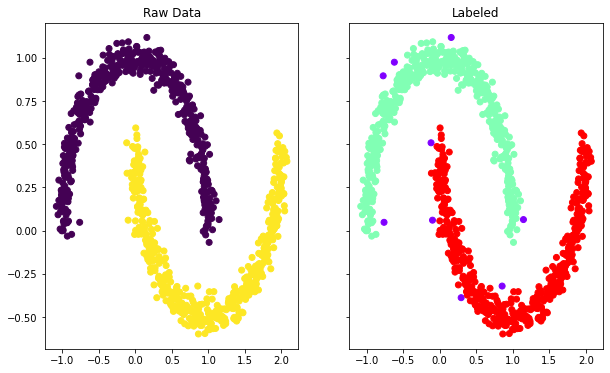

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title('Raw Data')
ax1.scatter(X[:,0],X[:,1],c=y)
ax2.set_title("Labeled")
ax2.scatter(X[:,0],X[:,1],c=y_predict,cmap='rainbow')

2. 

3. 

## Limits of DBSCAN